In [9]:
%pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


NetworkXError: draw_networkx_edge_labels does not support multiedges.

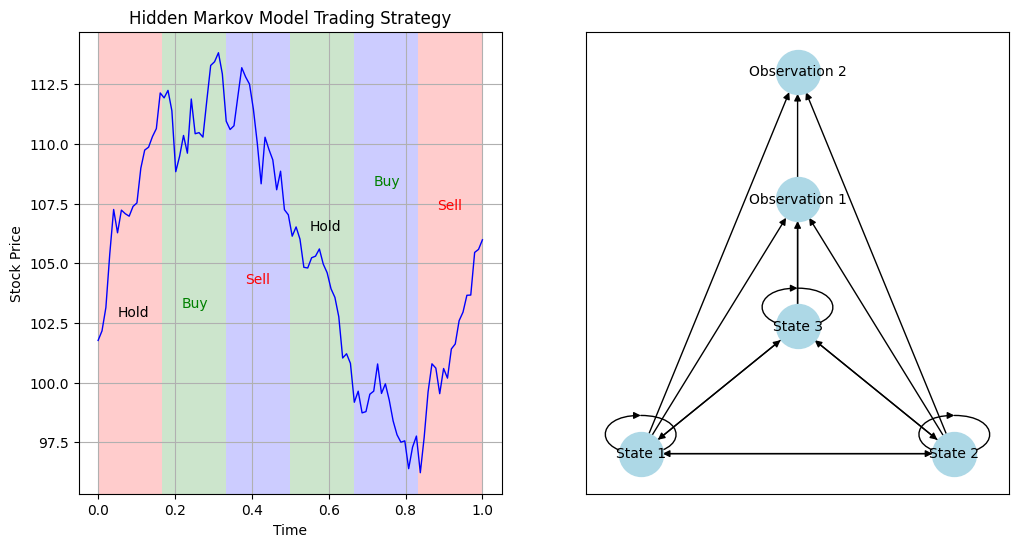

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Generate random stock price data
np.random.seed(0)
t = np.linspace(0, 1, 100)
stock_prices = np.cumsum(np.random.randn(100)) + 100

# Define hidden states
hidden_states = np.array([0, 1, 2, 1, 2, 0])  # Example hidden states (0, 1, 2)

# Define trading actions
actions = ['Hold', 'Buy', 'Sell', 'Hold', 'Buy', 'Sell']  # Example trading actions

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the stock prices
ax1.plot(t, stock_prices, color='blue', linewidth=1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Stock Price')
ax1.set_title('Hidden Markov Model Trading Strategy')
ax1.grid(True)

# Plot the hidden states and trading actions
for i, state in enumerate(hidden_states):
    if state == 0:
        ax1.axvspan(i / 6, (i + 1) / 6, facecolor='red', alpha=0.2)
    elif state == 1:
        ax1.axvspan(i / 6, (i + 1) / 6, facecolor='green', alpha=0.2)
    else:
        ax1.axvspan(i / 6, (i + 1) / 6, facecolor='blue', alpha=0.2)

    action_text = actions[i]
    if action_text == 'Buy':
        text_color = 'green'
    elif action_text == 'Sell':
        text_color = 'red'
    else:
        text_color = 'black'

    ax1.text(i / 6 + 0.05, stock_prices[i] + 1, action_text, fontsize=10, color=text_color)

# Generate the HMM diagram
states = ['State 1', 'State 2', 'State 3']
observations = ['Observation 1', 'Observation 2']

G = nx.MultiDiGraph()
G.add_nodes_from(states)
G.add_nodes_from(observations)

# Set transition probabilities
transition_probs = np.array([[0.7, 0.2, 0.1], [0.3, 0.4, 0.3], [0.2, 0.3, 0.5]])

# Set emission probabilities
emission_probs = np.array([[0.8, 0.2], [0.4, 0.6], [0.6, 0.4]])

for i in range(len(states)):
    for j in range(len(states)):
        weight = transition_probs[i, j]
        label = r'$P(' + states[i] + r'\rightarrow' + states[j] + r') = ' + str(weight) + r'$'
        G.add_edge(states[i], states[j], weight=weight, label=label)

for i in range(len(states)):
    for j in range(len(observations)):
        weight = emission_probs[i, j]
        label = r'$P(' + states[i] + r'\rightarrow' + observations[j] + r') = ' + str(weight) + r'$'
        G.add_edge(states[i], observations[j], weight=weight, label=label)

# Set layout positions for nodes
pos = {
    'State 1': (0, 0),
    'State 2': (1, 0),
    'State 3': (0.5, 1),
    'Observation 1': (0.5, 2),
    'Observation 2': (0.5, 3)
}

# Draw the HMM diagram
nx.draw_networkx(G, pos, ax=ax2, node_color='lightblue', node_size=1000, font_size=10, with_labels=True, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'), font_size=8)
ax2.set_title('Hidden Markov Model Structure')

# Remove axis
ax2.axis('off')

# Set the figure title
fig.suptitle('Hidden Markov Model Trading Strategy', fontsize=14)

# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()
